# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

04:16:15 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=608485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=548068;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#50\50]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=145663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=76064;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=939834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=857050;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

04:16:17 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=405985;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=65477;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#89\89]8;;\

04:16:18 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=889018;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=803030;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#89\89]8;;\

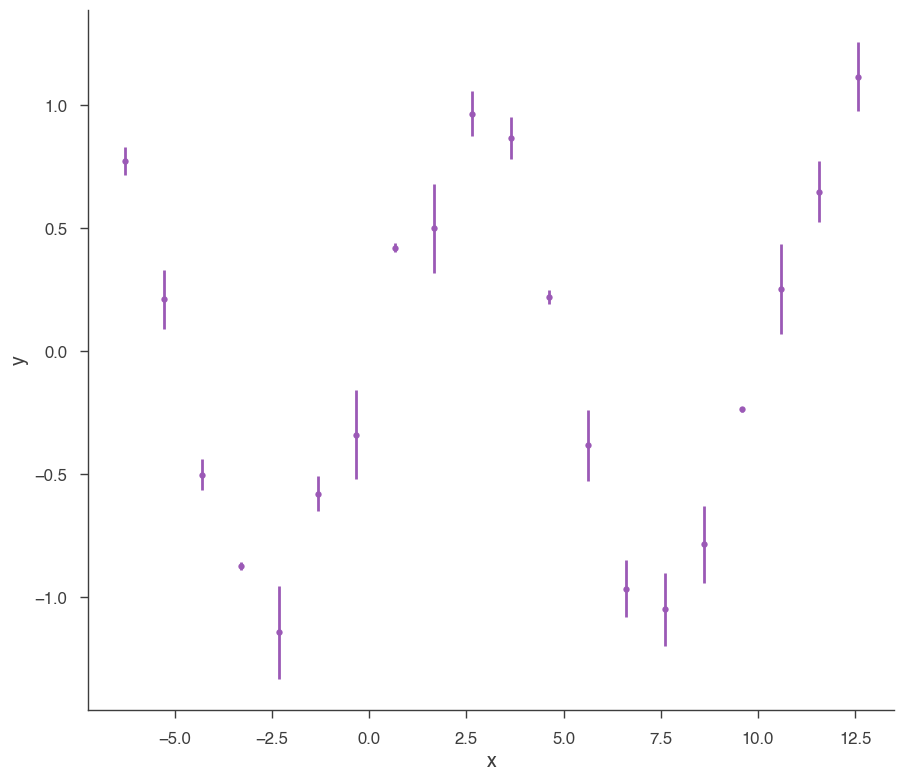

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=306525;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=115527;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

04:16:23 INFO      Mean acceptance fraction: 0.7234                                            ]8;id=669714;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=218013;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

04:16:24 INFO      fit restored to maximum of posterior                                         ]8;id=921191;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=488206;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=91694;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=37168;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                                  
demo.spectrum.main.Sin.K               1.005 -0.018 +0.013  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (1.0031 -0.0021 +0.0016) x 10^-1        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo         -9.966524
total        -9.966524

Values of statistical measures:

statistical measures
AIC              24.638931
BIC              25.924513
DIC              23.624680
PDIC              1.831629

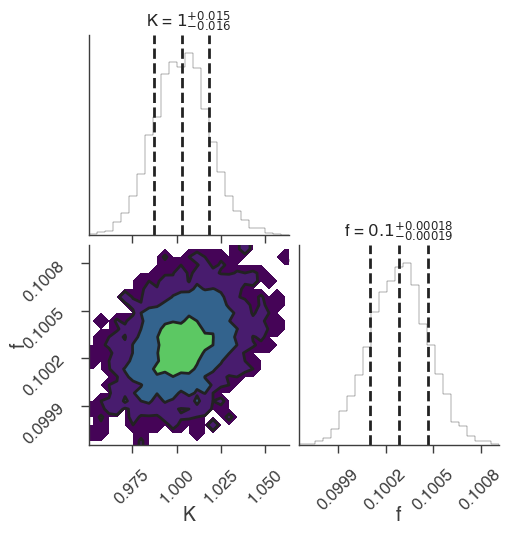

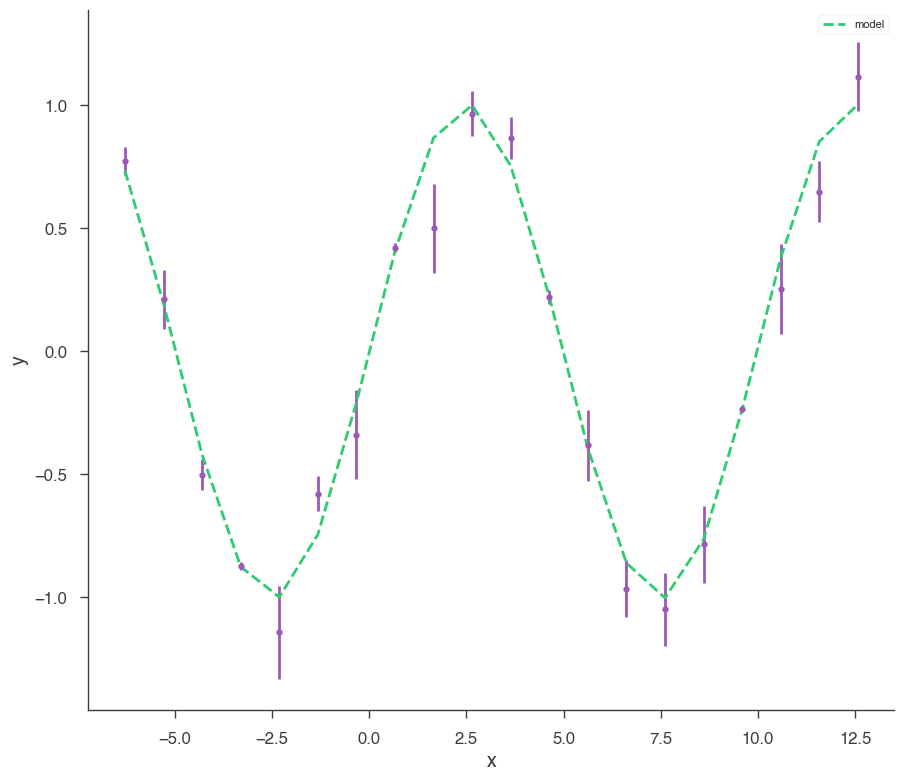

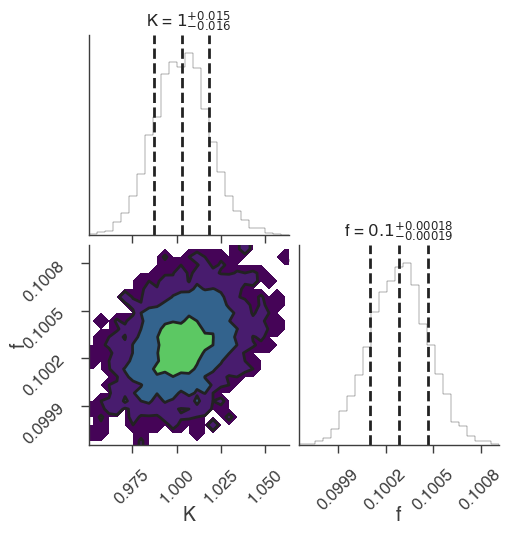

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

04:16:25 INFO      sampler set to multinest                                                ]8;id=869238;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=279115;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


 ln(ev)=  -20.127060645913176      +/-  0.15052069521593944     
  analysing data from chains/fit-.txt
 Total Likelihood Evaluations:         6415
 Sampling finished. Exiting MultiNest


04:16:27 INFO      fit restored to maximum of posterior                                         ]8;id=85485;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=475715;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=837827;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=548327;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                                  
demo.spectrum.main.Sin.K               1.006 -0.019 +0.020  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (1.0030 -0.0020 +0.0022) x 10^-1        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo         -9.967381
total        -9.967381

Values of statistical measures:

statistical measures
AIC                24.640644
BIC                25.926226
DIC                24.373092
PDIC                2.219012
log(Z)             -8.741071

         INFO      deleting the chain directory chains                                     ]8;id=144251;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=640003;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

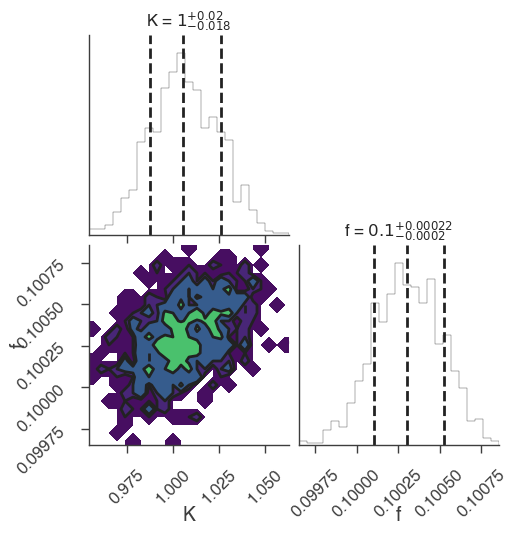

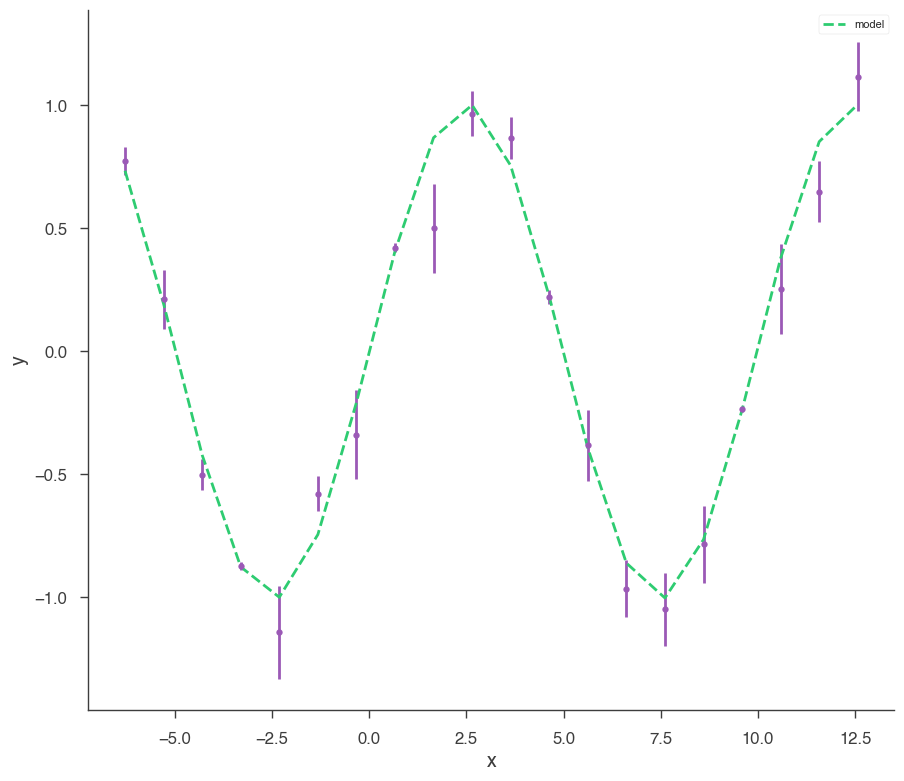

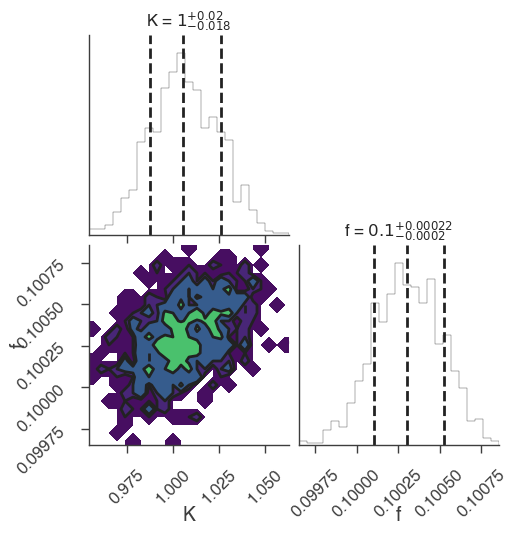

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

04:16:28 INFO      sampler set to dynesty_nested                                           ]8;id=166419;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=834105;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

0it [00:00, ?it/s]

160it [00:00, 1588.45it/s, bound: 0 | nc: 3 | ncall: 591 | eff(%): 27.073 | loglstar:   -inf < -5647.019 <    inf | logz: -5654.103 +/-  0.133 | dlogz: 5664.511 >  0.409]

319it [00:00, 1249.83it/s, bound: 0 | nc: 1 | ncall: 879 | eff(%): 36.291 | loglstar:   -inf < -3775.276 <    inf | logz: -3782.608 +/-  0.131 | dlogz: 3762.060 >  0.409]

449it [00:00, 1000.75it/s, bound: 0 | nc: 1 | ncall: 1226 | eff(%): 36.623 | loglstar:   -inf < -3040.189 <    inf | logz: -3047.129 +/-  0.129 | dlogz: 3025.111 >  0.409]

555it [00:00, 827.39it/s, bound: 0 | nc: 2 | ncall: 1579 | eff(%): 35.149 | loglstar:   -inf < -2569.982 <    inf | logz: -2578.009 +/-  0.140 | dlogz: 2558.200 >  0.409] 

643it [00:00, 714.10it/s, bound: 0 | nc: 1 | ncall: 1957 | eff(%): 32.856 | loglstar:   -inf < -2227.282 <    inf | logz: -2235.522 +/-  0.142 | dlogz: 2215.495 >  0.409]

719it [00:00, 612.32it/s, bound: 0 | nc: 5 | ncall: 2333 | eff(%): 30.819 | loglstar:   -inf < -1964.565 <    inf | logz: -1972.715 +/-  0.138 | dlogz: 1950.743 >  0.409]

784it [00:01, 520.75it/s, bound: 0 | nc: 4 | ncall: 2766 | eff(%): 28.344 | loglstar:   -inf < -1742.568 <    inf | logz: -1751.206 +/-  0.147 | dlogz: 1740.553 >  0.409]

839it [00:01, 442.54it/s, bound: 0 | nc: 2 | ncall: 3164 | eff(%): 26.517 | loglstar:   -inf < -1598.735 <    inf | logz: -1607.480 +/-  0.147 | dlogz: 1594.612 >  0.409]

886it [00:01, 387.84it/s, bound: 0 | nc: 4 | ncall: 3538 | eff(%): 25.042 | loglstar:   -inf < -1506.322 <    inf | logz: -1514.556 +/-  0.140 | dlogz: 1498.923 >  0.409]

927it [00:01, 326.83it/s, bound: 0 | nc: 23 | ncall: 3980 | eff(%): 23.291 | loglstar:   -inf < -1423.580 <    inf | logz: -1431.759 +/-  0.135 | dlogz: 1417.148 >  0.409]

962it [00:01, 300.99it/s, bound: 0 | nc: 8 | ncall: 4310 | eff(%): 22.320 | loglstar:   -inf < -1373.115 <    inf | logz: -1381.332 +/-  0.137 | dlogz: 1366.642 >  0.409] 

993it [00:01, 272.36it/s, bound: 0 | nc: 8 | ncall: 4662 | eff(%): 21.300 | loglstar:   -inf < -1317.701 <    inf | logz: -1326.852 +/-  0.151 | dlogz: 1316.001 >  0.409]

1021it [00:02, 231.27it/s, bound: 0 | nc: 4 | ncall: 5088 | eff(%): 20.067 | loglstar:   -inf < -1274.810 <    inf | logz: -1282.889 +/-  0.139 | dlogz: 1267.916 >  0.409]

1045it [00:02, 222.81it/s, bound: 0 | nc: 8 | ncall: 5348 | eff(%): 19.540 | loglstar:   -inf < -1241.314 <    inf | logz: -1249.352 +/-  0.136 | dlogz: 1234.227 >  0.409]

1068it [00:02, 197.61it/s, bound: 0 | nc: 10 | ncall: 5702 | eff(%): 18.730 | loglstar:   -inf < -1199.840 <    inf | logz: -1208.983 +/-  0.147 | dlogz: 1195.278 >  0.409]

1088it [00:02, 180.80it/s, bound: 0 | nc: 23 | ncall: 6021 | eff(%): 18.070 | loglstar:   -inf < -1162.592 <    inf | logz: -1171.890 +/-  0.150 | dlogz: 1158.911 >  0.409]

1107it [00:02, 178.61it/s, bound: 0 | nc: 40 | ncall: 6260 | eff(%): 17.684 | loglstar:   -inf < -1126.907 <    inf | logz: -1135.935 +/-  0.145 | dlogz: 1121.567 >  0.409]

1125it [00:02, 169.86it/s, bound: 0 | nc: 4 | ncall: 6600 | eff(%): 17.045 | loglstar:   -inf < -1086.872 <    inf | logz: -1095.602 +/-  0.140 | dlogz: 1080.455 >  0.409] 

1142it [00:02, 160.61it/s, bound: 0 | nc: 2 | ncall: 6912 | eff(%): 16.522 | loglstar:   -inf < -1068.771 <    inf | logz: -1077.523 +/-  0.142 | dlogz: 1062.498 >  0.409]

1158it [00:03, 157.55it/s, bound: 0 | nc: 23 | ncall: 7146 | eff(%): 16.205 | loglstar:   -inf < -1057.130 <    inf | logz: -1066.278 +/-  0.143 | dlogz: 1051.463 >  0.409]

1174it [00:03, 148.82it/s, bound: 0 | nc: 13 | ncall: 7422 | eff(%): 15.818 | loglstar:   -inf < -1039.590 <    inf | logz: -1048.532 +/-  0.142 | dlogz: 1033.433 >  0.409]

1189it [00:03, 122.86it/s, bound: 0 | nc: 50 | ncall: 7826 | eff(%): 15.193 | loglstar:   -inf < -1019.992 <    inf | logz: -1029.471 +/-  0.150 | dlogz: 1015.466 >  0.409]

1203it [00:03, 123.70it/s, bound: 0 | nc: 29 | ncall: 8066 | eff(%): 14.914 | loglstar:   -inf < -1004.925 <    inf | logz: -1014.217 +/-  0.146 | dlogz: 999.444 >  0.409] 

1216it [00:03, 115.01it/s, bound: 0 | nc: 15 | ncall: 8367 | eff(%): 14.533 | loglstar:   -inf < -989.078 <    inf | logz: -997.157 +/-  0.139 | dlogz: 981.313 >  0.409]  

1234it [00:03, 130.29it/s, bound: 0 | nc: 22 | ncall: 8639 | eff(%): 14.284 | loglstar:   -inf < -966.035 <    inf | logz: -974.776 +/-  0.141 | dlogz: 959.223 >  0.409]

1249it [00:03, 125.90it/s, bound: 0 | nc: 88 | ncall: 8940 | eff(%): 13.971 | loglstar:   -inf < -951.046 <    inf | logz: -960.260 +/-  0.145 | dlogz: 945.091 >  0.409]

1262it [00:04, 116.14it/s, bound: 0 | nc: 2 | ncall: 9291 | eff(%): 13.583 | loglstar:   -inf < -941.598 <    inf | logz: -950.703 +/-  0.142 | dlogz: 935.299 >  0.409] 

1274it [00:04, 107.34it/s, bound: 0 | nc: 17 | ncall: 9590 | eff(%): 13.285 | loglstar:   -inf < -935.564 <    inf | logz: -944.052 +/-  0.138 | dlogz: 928.175 >  0.409]

1285it [00:04, 104.04it/s, bound: 0 | nc: 2 | ncall: 9850 | eff(%): 13.046 | loglstar:   -inf < -929.690 <    inf | logz: -938.595 +/-  0.142 | dlogz: 923.020 >  0.409] 

1296it [00:04, 93.86it/s, bound: 0 | nc: 5 | ncall: 10185 | eff(%): 12.725 | loglstar:   -inf < -915.286 <    inf | logz: -923.755 +/-  0.140 | dlogz: 907.774 >  0.409]

1306it [00:04, 89.93it/s, bound: 0 | nc: 8 | ncall: 10463 | eff(%): 12.482 | loglstar:   -inf < -908.183 <    inf | logz: -916.794 +/-  0.142 | dlogz: 900.826 >  0.409]

1316it [00:04, 84.15it/s, bound: 0 | nc: 53 | ncall: 10776 | eff(%): 12.212 | loglstar:   -inf < -900.273 <    inf | logz: -908.398 +/-  0.139 | dlogz: 892.225 >  0.409]

1327it [00:04, 89.36it/s, bound: 0 | nc: 42 | ncall: 11007 | eff(%): 12.056 | loglstar:   -inf < -892.993 <    inf | logz: -901.235 +/-  0.138 | dlogz: 885.064 >  0.409]

1337it [00:04, 91.58it/s, bound: 0 | nc: 20 | ncall: 11227 | eff(%): 11.909 | loglstar:   -inf < -888.354 <    inf | logz: -896.722 +/-  0.137 | dlogz: 880.550 >  0.409]

1347it [00:05, 81.17it/s, bound: 0 | nc: 140 | ncall: 11583 | eff(%): 11.629 | loglstar:   -inf < -883.531 <    inf | logz: -892.627 +/-  0.139 | dlogz: 876.664 >  0.409]

1361it [00:05, 94.90it/s, bound: 0 | nc: 14 | ncall: 11809 | eff(%): 11.525 | loglstar:   -inf < -875.214 <    inf | logz: -884.567 +/-  0.143 | dlogz: 868.781 >  0.409] 

1372it [00:05, 94.24it/s, bound: 0 | nc: 55 | ncall: 12070 | eff(%): 11.367 | loglstar:   -inf < -850.504 <    inf | logz: -860.343 +/-  0.153 | dlogz: 845.782 >  0.409]

1386it [00:05, 102.95it/s, bound: 0 | nc: 57 | ncall: 12413 | eff(%): 11.166 | loglstar:   -inf < -827.436 <    inf | logz: -836.633 +/-  0.148 | dlogz: 821.008 >  0.409]

1397it [00:05, 104.64it/s, bound: 0 | nc: 31 | ncall: 12637 | eff(%): 11.055 | loglstar:   -inf < -797.136 <    inf | logz: -806.436 +/-  0.150 | dlogz: 790.911 >  0.409]

1409it [00:05, 108.27it/s, bound: 0 | nc: 12 | ncall: 12866 | eff(%): 10.951 | loglstar:   -inf < -770.201 <    inf | logz: -780.176 +/-  0.153 | dlogz: 765.273 >  0.409]

1421it [00:05, 86.22it/s, bound: 0 | nc: 43 | ncall: 13336 | eff(%): 10.655 | loglstar:   -inf < -733.508 <    inf | logz: -743.677 +/-  0.158 | dlogz: 730.237 >  0.409] 

1431it [00:05, 82.21it/s, bound: 0 | nc: 29 | ncall: 13640 | eff(%): 10.491 | loglstar:   -inf < -701.537 <    inf | logz: -711.672 +/-  0.156 | dlogz: 697.594 >  0.409]

1442it [00:06, 85.91it/s, bound: 0 | nc: 42 | ncall: 13893 | eff(%): 10.379 | loglstar:   -inf < -672.844 <    inf | logz: -683.117 +/-  0.160 | dlogz: 671.225 >  0.409]

1452it [00:06, 77.03it/s, bound: 0 | nc: 8 | ncall: 14266 | eff(%): 10.178 | loglstar:   -inf < -648.167 <    inf | logz: -657.689 +/-  0.148 | dlogz: 643.053 >  0.409] 

1461it [00:06, 74.79it/s, bound: 0 | nc: 80 | ncall: 14557 | eff(%): 10.036 | loglstar:   -inf < -635.615 <    inf | logz: -644.503 +/-  0.144 | dlogz: 629.295 >  0.409]

1469it [00:06, 54.86it/s, bound: 1 | nc: 1 | ncall: 14648 | eff(%): 10.029 | loglstar:   -inf < -603.179 <    inf | logz: -613.530 +/-  0.161 | dlogz: 604.729 >  0.409] 

1581it [00:06, 263.81it/s, bound: 1 | nc: 3 | ncall: 14795 | eff(%): 10.686 | loglstar:   -inf < -466.757 <    inf | logz: -475.683 +/-  0.144 | dlogz: 460.077 >  0.409]

1662it [00:06, 382.68it/s, bound: 1 | nc: 5 | ncall: 14941 | eff(%): 11.124 | loglstar:   -inf < -395.004 <    inf | logz: -404.818 +/-  0.148 | dlogz: 389.343 >  0.409]

1725it [00:06, 441.19it/s, bound: 1 | nc: 1 | ncall: 15098 | eff(%): 11.425 | loglstar:   -inf < -350.515 <    inf | logz: -360.393 +/-  0.148 | dlogz: 345.581 >  0.409]

1781it [00:07, 321.87it/s, bound: 2 | nc: 2 | ncall: 15246 | eff(%): 11.682 | loglstar:   -inf < -308.114 <    inf | logz: -318.162 +/-  0.154 | dlogz: 303.425 >  0.409]

1899it [00:07, 491.88it/s, bound: 2 | nc: 3 | ncall: 15402 | eff(%): 12.330 | loglstar:   -inf < -245.591 <    inf | logz: -256.105 +/-  0.154 | dlogz: 241.632 >  0.409]

2002it [00:07, 609.97it/s, bound: 2 | nc: 1 | ncall: 15570 | eff(%): 12.858 | loglstar:   -inf < -199.148 <    inf | logz: -209.663 +/-  0.156 | dlogz: 195.250 >  0.409]

2099it [00:07, 693.96it/s, bound: 2 | nc: 4 | ncall: 15783 | eff(%): 13.299 | loglstar:   -inf < -159.744 <    inf | logz: -170.134 +/-  0.152 | dlogz: 155.219 >  0.409]

2182it [00:07, 497.85it/s, bound: 3 | nc: 2 | ncall: 15924 | eff(%): 13.703 | loglstar:   -inf < -138.589 <    inf | logz: -148.419 +/-  0.150 | dlogz: 133.142 >  0.409]

2295it [00:07, 623.07it/s, bound: 3 | nc: 2 | ncall: 16087 | eff(%): 14.266 | loglstar:   -inf < -106.147 <    inf | logz: -116.703 +/-  0.154 | dlogz: 101.260 >  0.409]

2377it [00:07, 666.11it/s, bound: 3 | nc: 2 | ncall: 16248 | eff(%): 14.629 | loglstar:   -inf < -87.802 <    inf | logz: -98.632 +/-  0.154 | dlogz: 82.962 >  0.409]   

2461it [00:08, 707.34it/s, bound: 3 | nc: 1 | ncall: 16441 | eff(%): 14.969 | loglstar:   -inf < -75.627 <    inf | logz: -86.183 +/-  0.154 | dlogz: 70.209 >  0.409]

2543it [00:08, 543.27it/s, bound: 4 | nc: 1 | ncall: 16542 | eff(%): 15.373 | loglstar:   -inf < -64.793 <    inf | logz: -74.995 +/-  0.152 | dlogz: 58.718 >  0.409]

2642it [00:08, 636.94it/s, bound: 4 | nc: 2 | ncall: 16698 | eff(%): 15.822 | loglstar:   -inf < -51.303 <    inf | logz: -61.775 +/-  0.155 | dlogz: 45.255 >  0.409]

2724it [00:08, 678.69it/s, bound: 4 | nc: 1 | ncall: 16853 | eff(%): 16.163 | loglstar:   -inf < -43.508 <    inf | logz: -53.958 +/-  0.154 | dlogz: 37.222 >  0.409]

2803it [00:08, 487.72it/s, bound: 5 | nc: 1 | ncall: 17055 | eff(%): 16.435 | loglstar:   -inf < -37.130 <    inf | logz: -47.755 +/-  0.153 | dlogz: 30.815 >  0.409]

2912it [00:08, 606.30it/s, bound: 5 | nc: 1 | ncall: 17194 | eff(%): 16.936 | loglstar:   -inf < -31.821 <    inf | logz: -41.763 +/-  0.151 | dlogz: 24.500 >  0.409]

3007it [00:08, 681.63it/s, bound: 5 | nc: 1 | ncall: 17347 | eff(%): 17.334 | loglstar:   -inf < -27.200 <    inf | logz: -37.616 +/-  0.154 | dlogz: 20.124 >  0.409]

3090it [00:09, 713.66it/s, bound: 5 | nc: 1 | ncall: 17505 | eff(%): 17.652 | loglstar:   -inf < -24.004 <    inf | logz: -34.352 +/-  0.153 | dlogz: 16.643 >  0.409]

3173it [00:09, 510.37it/s, bound: 6 | nc: 1 | ncall: 17684 | eff(%): 17.943 | loglstar:   -inf < -21.245 <    inf | logz: -31.694 +/-  0.153 | dlogz: 13.774 >  0.409]

3296it [00:09, 653.62it/s, bound: 6 | nc: 1 | ncall: 17835 | eff(%): 18.481 | loglstar:   -inf < -18.700 <    inf | logz: -28.909 +/-  0.152 | dlogz: 10.707 >  0.409]

3387it [00:09, 708.34it/s, bound: 6 | nc: 2 | ncall: 17982 | eff(%): 18.836 | loglstar:   -inf < -16.964 <    inf | logz: -27.322 +/-  0.152 | dlogz:  8.914 >  0.409]

3473it [00:09, 741.71it/s, bound: 6 | nc: 5 | ncall: 18155 | eff(%): 19.130 | loglstar:   -inf < -15.666 <    inf | logz: -26.047 +/-  0.153 | dlogz:  7.422 >  0.409]

3559it [00:09, 519.41it/s, bound: 7 | nc: 1 | ncall: 18303 | eff(%): 19.445 | loglstar:   -inf < -14.457 <    inf | logz: -24.930 +/-  0.153 | dlogz:  6.099 >  0.409]

3660it [00:10, 613.64it/s, bound: 7 | nc: 5 | ncall: 18466 | eff(%): 19.820 | loglstar:   -inf < -13.405 <    inf | logz: -23.854 +/-  0.154 | dlogz:  4.775 >  0.409]

3746it [00:10, 667.17it/s, bound: 7 | nc: 3 | ncall: 18614 | eff(%): 20.125 | loglstar:   -inf < -12.764 <    inf | logz: -23.172 +/-  0.153 | dlogz:  3.888 >  0.409]

3827it [00:10, 692.76it/s, bound: 7 | nc: 4 | ncall: 18809 | eff(%): 20.347 | loglstar:   -inf < -12.170 <    inf | logz: -22.621 +/-  0.153 | dlogz:  3.156 >  0.409]

3907it [00:10, 516.91it/s, bound: 8 | nc: 1 | ncall: 18923 | eff(%): 20.647 | loglstar:   -inf < -11.761 <    inf | logz: -22.173 +/-  0.154 | dlogz:  2.545 >  0.409]

4013it [00:10, 628.13it/s, bound: 8 | nc: 1 | ncall: 19064 | eff(%): 21.050 | loglstar:   -inf < -11.341 <    inf | logz: -21.733 +/-  0.153 | dlogz:  1.916 >  0.409]

4103it [00:10, 688.45it/s, bound: 8 | nc: 3 | ncall: 19217 | eff(%): 21.351 | loglstar:   -inf < -11.040 <    inf | logz: -21.439 +/-  0.153 | dlogz:  1.493 >  0.409]

4184it [00:10, 689.01it/s, bound: 8 | nc: 1 | ncall: 19405 | eff(%): 21.561 | loglstar:   -inf < -10.870 <    inf | logz: -21.230 +/-  0.153 | dlogz:  1.189 >  0.409]

4262it [00:11, 505.02it/s, bound: 9 | nc: 2 | ncall: 19521 | eff(%): 21.833 | loglstar:   -inf < -10.699 <    inf | logz: -21.067 +/-  0.153 | dlogz:  0.955 >  0.409]

4365it [00:11, 610.80it/s, bound: 9 | nc: 2 | ncall: 19672 | eff(%): 22.189 | loglstar:   -inf < -10.545 <    inf | logz: -20.897 +/-  0.153 | dlogz:  0.714 >  0.409]

4445it [00:11, 652.87it/s, bound: 9 | nc: 1 | ncall: 19824 | eff(%): 22.422 | loglstar:   -inf < -10.440 <    inf | logz: -20.792 +/-  0.153 | dlogz:  0.570 >  0.409]

4536it [00:11, 715.24it/s, bound: 9 | nc: 1 | ncall: 20034 | eff(%): 22.642 | loglstar:   -inf < -10.345 <    inf | logz: -20.696 +/-  0.153 | dlogz:  0.442 >  0.409]

4563it [00:11, 390.71it/s, +400 | bound: 10 | nc: 1 | ncall: 20478 | eff(%): 24.719 | loglstar:   -inf < -9.961 <    inf | logz: -20.317 +/-  0.153 | dlogz:  0.001 >  0.409]

04:16:40 INFO      fit restored to maximum of posterior                                         ]8;id=841567;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=66881;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=690206;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=419709;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                                  
demo.spectrum.main.Sin.K                   1.005 +/- 0.017  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (1.0031 -0.0020 +0.0017) x 10^-1        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo         -9.966792
total        -9.966792

Values of statistical measures:

statistical measures
AIC                24.639466
BIC                25.925049
DIC                23.834478
PDIC                1.950193
log(Z)             -8.823400

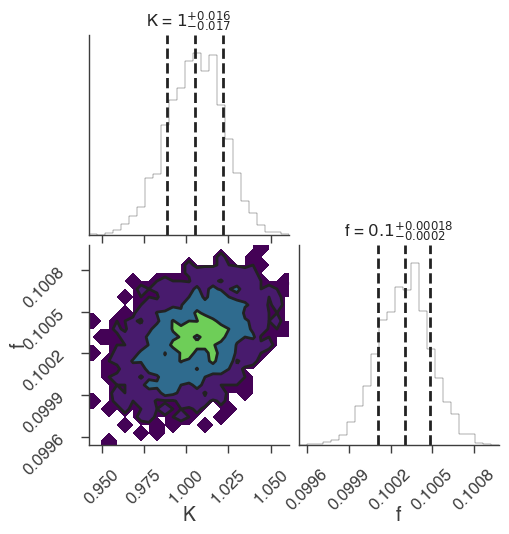

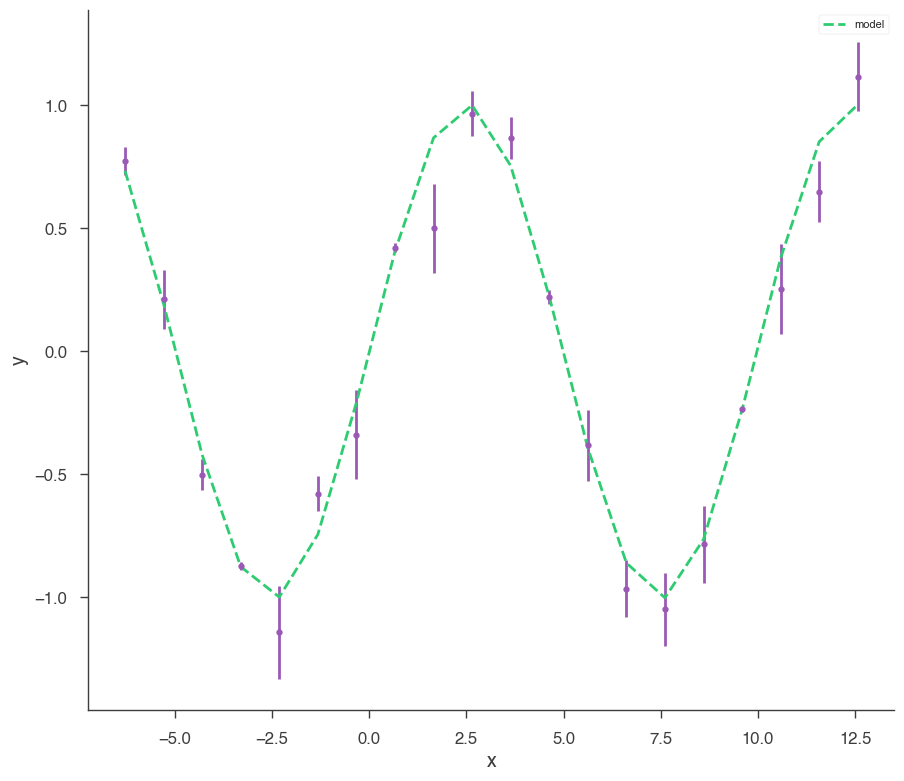

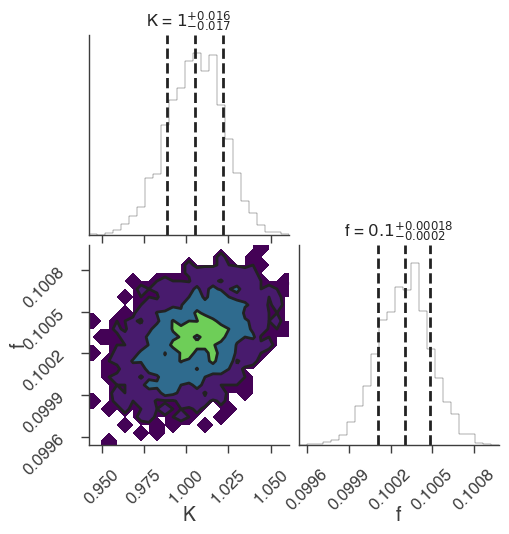

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

04:16:41 INFO      sampler set to dynesty_dynamic                                          ]8;id=73659;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=359749;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

0it [00:00, ?it/s]

18it [00:00, 179.97it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 18 | eff(%):  3.475 | loglstar:   -inf < -12523.684 <    inf | logz: -12530.628 +/-  0.118 | dlogz: 12633.490 >  0.010]

155it [00:00, 879.47it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 172 | eff(%): 23.065 | loglstar:   -inf < -6499.917 <    inf | logz: -6507.129 +/-  0.120 | dlogz: 6497.543 >  0.010] 

259it [00:00, 950.88it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 324 | eff(%): 31.432 | loglstar:   -inf < -5107.357 <    inf | logz: -5114.783 +/-  0.122 | dlogz: 5112.158 >  0.010]

371it [00:00, 1017.35it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 517 | eff(%): 36.480 | loglstar:   -inf < -4155.306 <    inf | logz: -4162.186 +/-  0.114 | dlogz: 4147.601 >  0.010]

473it [00:00, 919.85it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 741 | eff(%): 38.114 | loglstar:   -inf < -3560.713 <    inf | logz: -3568.566 +/-  0.125 | dlogz: 3567.867 >  0.010] 

567it [00:00, 894.63it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 958 | eff(%): 38.889 | loglstar:   -inf < -3175.084 <    inf | logz: -3183.032 +/-  0.124 | dlogz: 3169.859 >  0.010]

658it [00:00, 816.90it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 1224 | eff(%): 38.167 | loglstar:   -inf < -2838.956 <    inf | logz: -2846.859 +/-  0.122 | dlogz: 2832.380 >  0.010]

742it [00:00, 683.04it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 1554 | eff(%): 36.125 | loglstar:   -inf < -2559.780 <    inf | logz: -2568.147 +/-  0.128 | dlogz: 2555.688 >  0.010]

815it [00:01, 590.62it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 1889 | eff(%): 34.115 | loglstar:   -inf < -2284.095 <    inf | logz: -2292.336 +/-  0.125 | dlogz: 2277.607 >  0.010]

879it [00:01, 520.30it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 2224 | eff(%): 32.269 | loglstar:   -inf < -2123.259 <    inf | logz: -2131.910 +/-  0.131 | dlogz: 2120.063 >  0.010]

935it [00:01, 484.38it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 2505 | eff(%): 31.115 | loglstar:   -inf < -1967.611 <    inf | logz: -1975.066 +/-  0.118 | dlogz: 1958.761 >  0.010]

986it [00:01, 445.61it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 2798 | eff(%): 29.897 | loglstar:   -inf < -1843.078 <    inf | logz: -1851.890 +/-  0.131 | dlogz: 1838.083 >  0.010]

1032it [00:01, 386.48it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 3155 | eff(%): 28.235 | loglstar:   -inf < -1746.611 <    inf | logz: -1754.936 +/-  0.123 | dlogz: 1738.770 >  0.010]

1073it [00:01, 365.22it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 3425 | eff(%): 27.338 | loglstar:   -inf < -1651.843 <    inf | logz: -1660.894 +/-  0.134 | dlogz: 1652.976 >  0.010]

1111it [00:02, 340.12it/s, batch: 0 | bound: 0 | nc: 13 | ncall: 3701 | eff(%): 26.446 | loglstar:   -inf < -1578.671 <    inf | logz: -1586.509 +/-  0.122 | dlogz: 1573.519 >  0.010]

1146it [00:02, 313.16it/s, batch: 0 | bound: 0 | nc: 13 | ncall: 3997 | eff(%): 25.484 | loglstar:   -inf < -1529.707 <    inf | logz: -1537.677 +/-  0.124 | dlogz: 1524.796 >  0.010]

1178it [00:02, 273.08it/s, batch: 0 | bound: 0 | nc: 11 | ncall: 4357 | eff(%): 24.254 | loglstar:   -inf < -1472.948 <    inf | logz: -1481.361 +/-  0.123 | dlogz: 1468.560 >  0.010]

1206it [00:02, 256.39it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 4639 | eff(%): 23.468 | loglstar:   -inf < -1434.522 <    inf | logz: -1443.025 +/-  0.124 | dlogz: 1430.280 >  0.010] 

1232it [00:02, 254.15it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 4861 | eff(%): 22.981 | loglstar:   -inf < -1393.052 <    inf | logz: -1401.993 +/-  0.128 | dlogz: 1389.636 >  0.010]

1258it [00:02, 241.53it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 5122 | eff(%): 22.376 | loglstar:   -inf < -1345.011 <    inf | logz: -1353.900 +/-  0.127 | dlogz: 1341.137 >  0.010]

1283it [00:02, 205.85it/s, batch: 0 | bound: 0 | nc: 11 | ncall: 5496 | eff(%): 21.398 | loglstar:   -inf < -1307.963 <    inf | logz: -1317.248 +/-  0.132 | dlogz: 1305.525 >  0.010]

1307it [00:02, 212.05it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 5717 | eff(%): 21.023 | loglstar:   -inf < -1278.407 <    inf | logz: -1287.030 +/-  0.130 | dlogz: 1274.213 >  0.010]

1329it [00:03, 192.32it/s, batch: 0 | bound: 0 | nc: 43 | ncall: 6040 | eff(%): 20.321 | loglstar:   -inf < -1241.553 <    inf | logz: -1250.371 +/-  0.125 | dlogz: 1237.187 >  0.010]

1349it [00:03, 186.87it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 6294 | eff(%): 19.856 | loglstar:   -inf < -1213.082 <    inf | logz: -1222.503 +/-  0.134 | dlogz: 1210.792 >  0.010] 

1369it [00:03, 180.72it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 6560 | eff(%): 19.391 | loglstar:   -inf < -1187.769 <    inf | logz: -1196.168 +/-  0.127 | dlogz: 1182.874 >  0.010]

1388it [00:03, 180.37it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 6790 | eff(%): 19.040 | loglstar:   -inf < -1168.372 <    inf | logz: -1177.735 +/-  0.131 | dlogz: 1165.112 >  0.010]

1407it [00:03, 172.28it/s, batch: 0 | bound: 0 | nc: 54 | ncall: 7060 | eff(%): 18.611 | loglstar:   -inf < -1146.150 <    inf | logz: -1155.635 +/-  0.133 | dlogz: 1143.249 >  0.010]

1425it [00:03, 148.67it/s, batch: 0 | bound: 0 | nc: 36 | ncall: 7431 | eff(%): 17.967 | loglstar:   -inf < -1131.370 <    inf | logz: -1140.167 +/-  0.128 | dlogz: 1126.848 >  0.010]

1441it [00:03, 149.65it/s, batch: 0 | bound: 0 | nc: 27 | ncall: 7659 | eff(%): 17.661 | loglstar:   -inf < -1106.608 <    inf | logz: -1116.394 +/-  0.140 | dlogz: 1108.870 >  0.010]

1457it [00:03, 134.37it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 7995 | eff(%): 17.151 | loglstar:   -inf < -1092.674 <    inf | logz: -1102.005 +/-  0.130 | dlogz: 1088.986 >  0.010]

1474it [00:04, 142.49it/s, batch: 0 | bound: 0 | nc: 11 | ncall: 8214 | eff(%): 16.915 | loglstar:   -inf < -1070.369 <    inf | logz: -1079.968 +/-  0.134 | dlogz: 1067.686 >  0.010]

1491it [00:04, 148.11it/s, batch: 0 | bound: 0 | nc: 20 | ncall: 8442 | eff(%): 16.674 | loglstar:   -inf < -1061.265 <    inf | logz: -1069.449 +/-  0.120 | dlogz: 1055.428 >  0.010]

1507it [00:04, 134.03it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 8768 | eff(%): 16.260 | loglstar:   -inf < -1051.493 <    inf | logz: -1059.828 +/-  0.125 | dlogz: 1045.918 >  0.010] 

1521it [00:04, 131.39it/s, batch: 0 | bound: 0 | nc: 55 | ncall: 9018 | eff(%): 15.980 | loglstar:   -inf < -1043.408 <    inf | logz: -1051.797 +/-  0.124 | dlogz: 1037.872 >  0.010]

1535it [00:04, 114.80it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 9385 | eff(%): 15.529 | loglstar:   -inf < -1035.100 <    inf | logz: -1044.191 +/-  0.125 | dlogz: 1030.413 >  0.010] 

1551it [00:04, 120.69it/s, batch: 0 | bound: 0 | nc: 58 | ncall: 9640 | eff(%): 15.296 | loglstar:   -inf < -1017.064 <    inf | logz: -1026.317 +/-  0.130 | dlogz: 1012.849 >  0.010]

1564it [00:04, 116.74it/s, batch: 0 | bound: 0 | nc: 27 | ncall: 9910 | eff(%): 15.024 | loglstar:   -inf < -995.156 <    inf | logz: -1004.712 +/-  0.133 | dlogz: 991.472 >  0.010]  

1579it [00:04, 124.47it/s, batch: 0 | bound: 0 | nc: 23 | ncall: 10132 | eff(%): 14.851 | loglstar:   -inf < -978.039 <    inf | logz: -987.197 +/-  0.130 | dlogz: 973.609 >  0.010]

1592it [00:05, 119.59it/s, batch: 0 | bound: 0 | nc: 17 | ncall: 10396 | eff(%): 14.611 | loglstar:   -inf < -968.381 <    inf | logz: -977.506 +/-  0.130 | dlogz: 963.893 >  0.010]

1605it [00:05, 111.52it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 10690 | eff(%): 14.343 | loglstar:   -inf < -960.672 <    inf | logz: -969.375 +/-  0.126 | dlogz: 955.296 >  0.010] 

1620it [00:05, 119.98it/s, batch: 0 | bound: 0 | nc: 39 | ncall: 10914 | eff(%): 14.193 | loglstar:   -inf < -950.334 <    inf | logz: -959.377 +/-  0.127 | dlogz: 945.367 >  0.010]

1633it [00:05, 115.75it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 11185 | eff(%): 13.975 | loglstar:   -inf < -941.541 <    inf | logz: -950.782 +/-  0.128 | dlogz: 936.837 >  0.010] 

1649it [00:05, 124.61it/s, batch: 0 | bound: 0 | nc: 33 | ncall: 11441 | eff(%): 13.810 | loglstar:   -inf < -931.774 <    inf | logz: -940.326 +/-  0.126 | dlogz: 926.085 >  0.010]

1662it [00:05, 103.16it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 11855 | eff(%): 13.452 | loglstar:   -inf < -919.228 <    inf | logz: -929.294 +/-  0.138 | dlogz: 916.778 >  0.010] 

1674it [00:05, 104.16it/s, batch: 0 | bound: 0 | nc: 11 | ncall: 12101 | eff(%): 13.285 | loglstar:   -inf < -909.835 <    inf | logz: -919.053 +/-  0.130 | dlogz: 905.143 >  0.010]

1685it [00:06, 92.75it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 12450 | eff(%): 13.012 | loglstar:   -inf < -900.551 <    inf | logz: -910.388 +/-  0.132 | dlogz: 896.881 >  0.010]  

1695it [00:06, 89.39it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 12731 | eff(%): 12.811 | loglstar:   -inf < -894.781 <    inf | logz: -904.288 +/-  0.128 | dlogz: 890.274 >  0.010]

1705it [00:06, 84.67it/s, batch: 0 | bound: 0 | nc: 114 | ncall: 13035 | eff(%): 12.597 | loglstar:   -inf < -892.022 <    inf | logz: -900.675 +/-  0.122 | dlogz: 886.170 >  0.010]

1716it [00:06, 86.22it/s, batch: 0 | bound: 0 | nc: 67 | ncall: 13307 | eff(%): 12.428 | loglstar:   -inf < -885.543 <    inf | logz: -894.701 +/-  0.128 | dlogz: 880.571 >  0.010] 

1730it [00:06, 99.39it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 13527 | eff(%): 12.333 | loglstar:   -inf < -881.687 <    inf | logz: -890.223 +/-  0.123 | dlogz: 875.711 >  0.010] 

1743it [00:06, 105.80it/s, batch: 0 | bound: 0 | nc: 22 | ncall: 13762 | eff(%): 12.221 | loglstar:   -inf < -871.213 <    inf | logz: -880.479 +/-  0.134 | dlogz: 866.555 >  0.010]

1754it [00:06, 97.34it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 14068 | eff(%): 12.040 | loglstar:   -inf < -850.602 <    inf | logz: -859.940 +/-  0.136 | dlogz: 846.128 >  0.010]  

1765it [00:06, 89.97it/s, batch: 0 | bound: 0 | nc: 37 | ncall: 14392 | eff(%): 11.852 | loglstar:   -inf < -834.527 <    inf | logz: -844.737 +/-  0.138 | dlogz: 831.733 >  0.010]

1775it [00:07, 86.02it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 14687 | eff(%): 11.688 | loglstar:   -inf < -818.932 <    inf | logz: -828.004 +/-  0.132 | dlogz: 813.732 >  0.010] 

1784it [00:07, 80.59it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 14984 | eff(%): 11.522 | loglstar:   -inf < -803.679 <    inf | logz: -813.444 +/-  0.137 | dlogz: 799.831 >  0.010]

1793it [00:07, 82.89it/s, batch: 0 | bound: 0 | nc: 42 | ncall: 15207 | eff(%): 11.415 | loglstar:   -inf < -778.083 <    inf | logz: -788.535 +/-  0.143 | dlogz: 777.515 >  0.010]

1803it [00:07, 81.56it/s, batch: 0 | bound: 0 | nc: 75 | ncall: 15491 | eff(%): 11.275 | loglstar:   -inf < -747.168 <    inf | logz: -756.698 +/-  0.136 | dlogz: 742.793 >  0.010]

1812it [00:07, 82.22it/s, batch: 0 | bound: 0 | nc: 30 | ncall: 15731 | eff(%): 11.164 | loglstar:   -inf < -719.293 <    inf | logz: -729.789 +/-  0.144 | dlogz: 718.879 >  0.010]

1821it [00:07, 74.86it/s, batch: 0 | bound: 0 | nc: 29 | ncall: 16063 | eff(%): 10.994 | loglstar:   -inf < -701.368 <    inf | logz: -711.645 +/-  0.139 | dlogz: 698.583 >  0.010]

1829it [00:07, 71.02it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 16355 | eff(%): 10.851 | loglstar:   -inf < -692.839 <    inf | logz: -702.939 +/-  0.137 | dlogz: 689.868 >  0.010] 

1837it [00:07, 61.93it/s, batch: 0 | bound: 0 | nc: 111 | ncall: 16749 | eff(%): 10.650 | loglstar:   -inf < -679.740 <    inf | logz: -690.114 +/-  0.140 | dlogz: 677.477 >  0.010]

1844it [00:08, 57.05it/s, batch: 0 | bound: 0 | nc: 49 | ncall: 17099 | eff(%): 10.478 | loglstar:   -inf < -669.786 <    inf | logz: -678.996 +/-  0.131 | dlogz: 664.946 >  0.010] 

1850it [00:08, 56.16it/s, batch: 0 | bound: 0 | nc: 42 | ncall: 17352 | eff(%): 10.363 | loglstar:   -inf < -662.497 <    inf | logz: -672.223 +/-  0.135 | dlogz: 658.536 >  0.010]

1858it [00:08, 58.37it/s, batch: 0 | bound: 0 | nc: 107 | ncall: 17631 | eff(%): 10.248 | loglstar:   -inf < -645.319 <    inf | logz: -655.789 +/-  0.141 | dlogz: 643.391 >  0.010]

1865it [00:08, 54.54it/s, batch: 0 | bound: 0 | nc: 185 | ncall: 17974 | eff(%): 10.095 | loglstar:   -inf < -635.885 <    inf | logz: -645.994 +/-  0.136 | dlogz: 632.578 >  0.010]

1877it [00:08, 67.13it/s, batch: 0 | bound: 0 | nc: 60 | ncall: 18234 | eff(%): 10.019 | loglstar:   -inf < -618.632 <    inf | logz: -628.782 +/-  0.138 | dlogz: 615.597 >  0.010] 

1884it [00:08, 47.62it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 18327 | eff(%): 10.007 | loglstar:   -inf < -612.975 <    inf | logz: -622.241 +/-  0.131 | dlogz: 608.043 >  0.010] 

1973it [00:08, 214.09it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 18471 | eff(%): 10.400 | loglstar:   -inf < -512.724 <    inf | logz: -522.522 +/-  0.135 | dlogz: 508.446 >  0.010]

2064it [00:09, 365.82it/s, batch: 0 | bound: 1 | nc: 5 | ncall: 18625 | eff(%): 10.792 | loglstar:   -inf < -447.877 <    inf | logz: -457.380 +/-  0.132 | dlogz: 443.564 >  0.010]

2139it [00:09, 457.01it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 18774 | eff(%): 11.098 | loglstar:   -inf < -409.042 <    inf | logz: -418.383 +/-  0.132 | dlogz: 404.259 >  0.010]

2208it [00:09, 513.78it/s, batch: 0 | bound: 1 | nc: 5 | ncall: 18928 | eff(%): 11.365 | loglstar:   -inf < -372.728 <    inf | logz: -382.429 +/-  0.137 | dlogz: 368.318 >  0.010]

2269it [00:09, 335.35it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 19077 | eff(%): 11.590 | loglstar:   -inf < -339.682 <    inf | logz: -349.912 +/-  0.137 | dlogz: 335.804 >  0.010]

2369it [00:09, 461.69it/s, batch: 0 | bound: 2 | nc: 3 | ncall: 19214 | eff(%): 12.017 | loglstar:   -inf < -280.681 <    inf | logz: -291.162 +/-  0.137 | dlogz: 276.931 >  0.010]

2452it [00:09, 540.13it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 19361 | eff(%): 12.346 | loglstar:   -inf < -244.240 <    inf | logz: -253.823 +/-  0.134 | dlogz: 238.968 >  0.010]

2533it [00:09, 601.94it/s, batch: 0 | bound: 2 | nc: 3 | ncall: 19510 | eff(%): 12.659 | loglstar:   -inf < -208.239 <    inf | logz: -218.744 +/-  0.137 | dlogz: 204.036 >  0.010]

2606it [00:09, 620.36it/s, batch: 0 | bound: 2 | nc: 3 | ncall: 19685 | eff(%): 12.911 | loglstar:   -inf < -181.558 <    inf | logz: -191.703 +/-  0.137 | dlogz: 176.711 >  0.010]

2677it [00:10, 403.94it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19842 | eff(%): 13.160 | loglstar:   -inf < -160.902 <    inf | logz: -171.909 +/-  0.141 | dlogz: 157.098 >  0.010]

2796it [00:10, 551.94it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 20010 | eff(%): 13.632 | loglstar:   -inf < -132.671 <    inf | logz: -143.117 +/-  0.138 | dlogz: 127.688 >  0.010]

2890it [00:10, 633.28it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 20153 | eff(%): 13.993 | loglstar:   -inf < -112.406 <    inf | logz: -122.714 +/-  0.137 | dlogz: 107.074 >  0.010]

2971it [00:10, 670.34it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 20306 | eff(%): 14.280 | loglstar:   -inf < -94.909 <    inf | logz: -105.477 +/-  0.137 | dlogz: 89.668 >  0.010]  

3051it [00:10, 655.88it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 20513 | eff(%): 14.520 | loglstar:   -inf < -83.510 <    inf | logz: -93.455 +/-  0.135 | dlogz: 77.390 >  0.010] 

3126it [00:11, 451.51it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 20637 | eff(%): 14.789 | loglstar:   -inf < -73.495 <    inf | logz: -84.113 +/-  0.138 | dlogz: 67.957 >  0.010]

3234it [00:11, 571.43it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 20792 | eff(%): 15.189 | loglstar:   -inf < -59.828 <    inf | logz: -70.079 +/-  0.137 | dlogz: 53.641 >  0.010]

3322it [00:11, 635.34it/s, batch: 0 | bound: 4 | nc: 5 | ncall: 20940 | eff(%): 15.494 | loglstar:   -inf < -50.711 <    inf | logz: -61.429 +/-  0.139 | dlogz: 44.842 >  0.010]

3400it [00:11, 652.48it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 21112 | eff(%): 15.732 | loglstar:   -inf < -45.082 <    inf | logz: -55.360 +/-  0.137 | dlogz: 38.567 >  0.010]

3476it [00:11, 642.55it/s, batch: 0 | bound: 4 | nc: 3 | ncall: 21310 | eff(%): 15.938 | loglstar:   -inf < -41.384 <    inf | logz: -51.495 +/-  0.135 | dlogz: 34.531 >  0.010]

3548it [00:11, 463.58it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 21404 | eff(%): 16.198 | loglstar:   -inf < -37.491 <    inf | logz: -47.936 +/-  0.137 | dlogz: 30.838 >  0.010]

3651it [00:11, 576.38it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 21549 | eff(%): 16.559 | loglstar:   -inf < -32.241 <    inf | logz: -42.781 +/-  0.138 | dlogz: 25.471 >  0.010]

3730it [00:11, 619.65it/s, batch: 0 | bound: 5 | nc: 7 | ncall: 21705 | eff(%): 16.798 | loglstar:   -inf < -29.063 <    inf | logz: -39.370 +/-  0.137 | dlogz: 21.886 >  0.010]

3807it [00:12, 654.64it/s, batch: 0 | bound: 5 | nc: 3 | ncall: 21853 | eff(%): 17.031 | loglstar:   -inf < -26.259 <    inf | logz: -36.701 +/-  0.137 | dlogz: 19.068 >  0.010]

3882it [00:12, 670.03it/s, batch: 0 | bound: 5 | nc: 2 | ncall: 22046 | eff(%): 17.218 | loglstar:   -inf < -23.517 <    inf | logz: -33.955 +/-  0.138 | dlogz: 16.167 >  0.010]

3956it [00:12, 454.92it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 22156 | eff(%): 17.461 | loglstar:   -inf < -21.431 <    inf | logz: -31.922 +/-  0.138 | dlogz: 14.011 >  0.010]

4059it [00:12, 569.30it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 22291 | eff(%): 17.810 | loglstar:   -inf < -19.187 <    inf | logz: -29.535 +/-  0.137 | dlogz: 11.410 >  0.010]

4142it [00:12, 626.46it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 22436 | eff(%): 18.059 | loglstar:   -inf < -17.933 <    inf | logz: -28.150 +/-  0.137 | dlogz:  9.900 >  0.010]

4218it [00:12, 655.32it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 22595 | eff(%): 18.264 | loglstar:   -inf < -16.785 <    inf | logz: -27.104 +/-  0.136 | dlogz:  8.701 >  0.010]

4293it [00:12, 677.85it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 22758 | eff(%): 18.458 | loglstar:   -inf < -15.948 <    inf | logz: -26.217 +/-  0.136 | dlogz:  7.663 >  0.010]

4368it [00:13, 455.58it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22884 | eff(%): 18.679 | loglstar:   -inf < -15.208 <    inf | logz: -25.491 +/-  0.136 | dlogz:  6.786 >  0.010]

4476it [00:13, 579.25it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 23035 | eff(%): 19.018 | loglstar:   -inf < -14.127 <    inf | logz: -24.498 +/-  0.136 | dlogz:  5.598 >  0.010]

4574it [00:13, 667.67it/s, batch: 0 | bound: 7 | nc: 3 | ncall: 23193 | eff(%): 19.305 | loglstar:   -inf < -13.352 <    inf | logz: -23.721 +/-  0.137 | dlogz:  4.630 >  0.010]

4656it [00:13, 690.28it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 23366 | eff(%): 19.509 | loglstar:   -inf < -12.851 <    inf | logz: -23.205 +/-  0.137 | dlogz:  3.960 >  0.010]

4736it [00:13, 689.26it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 23564 | eff(%): 19.681 | loglstar:   -inf < -12.451 <    inf | logz: -22.787 +/-  0.137 | dlogz:  3.396 >  0.010]

4813it [00:13, 484.91it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 23671 | eff(%): 19.912 | loglstar:   -inf < -12.083 <    inf | logz: -22.441 +/-  0.137 | dlogz:  2.917 >  0.010]

4932it [00:13, 626.03it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 23837 | eff(%): 20.265 | loglstar:   -inf < -11.649 <    inf | logz: -21.998 +/-  0.137 | dlogz:  2.286 >  0.010]

5017it [00:14, 673.49it/s, batch: 0 | bound: 8 | nc: 3 | ncall: 23989 | eff(%): 20.487 | loglstar:   -inf < -11.411 <    inf | logz: -21.746 +/-  0.137 | dlogz:  1.916 >  0.010]

5098it [00:14, 703.61it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 24152 | eff(%): 20.680 | loglstar:   -inf < -11.204 <    inf | logz: -21.541 +/-  0.137 | dlogz:  1.614 >  0.010]

5179it [00:14, 724.04it/s, batch: 0 | bound: 8 | nc: 6 | ncall: 24337 | eff(%): 20.852 | loglstar:   -inf < -11.009 <    inf | logz: -21.366 +/-  0.137 | dlogz:  1.358 >  0.010]

5259it [00:14, 492.81it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 24434 | eff(%): 21.092 | loglstar:   -inf < -10.873 <    inf | logz: -21.218 +/-  0.137 | dlogz:  1.139 >  0.010]

5378it [00:14, 632.09it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 24597 | eff(%): 21.429 | loglstar:   -inf < -10.695 <    inf | logz: -21.037 +/-  0.137 | dlogz:  0.874 >  0.010]

5466it [00:14, 685.64it/s, batch: 0 | bound: 9 | nc: 4 | ncall: 24745 | eff(%): 21.652 | loglstar:   -inf < -10.580 <    inf | logz: -20.929 +/-  0.137 | dlogz:  0.719 >  0.010]

5573it [00:14, 777.68it/s, batch: 0 | bound: 9 | nc: 3 | ncall: 24951 | eff(%): 21.897 | loglstar:   -inf < -10.470 <    inf | logz: -20.820 +/-  0.137 | dlogz:  0.566 >  0.010]

5663it [00:15, 506.80it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 25131 | eff(%): 22.094 | loglstar:   -inf < -10.376 <    inf | logz: -20.745 +/-  0.137 | dlogz:  0.464 >  0.010]

5780it [00:15, 629.97it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 25277 | eff(%): 22.423 | loglstar:   -inf < -10.297 <    inf | logz: -20.664 +/-  0.137 | dlogz:  0.358 >  0.010]

5871it [00:15, 687.38it/s, batch: 0 | bound: 10 | nc: 3 | ncall: 25426 | eff(%): 22.645 | loglstar:   -inf < -10.235 <    inf | logz: -20.613 +/-  0.137 | dlogz:  0.293 >  0.010]

5958it [00:15, 719.56it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 25585 | eff(%): 22.841 | loglstar:   -inf < -10.178 <    inf | logz: -20.571 +/-  0.137 | dlogz:  0.243 >  0.010]

6043it [00:15, 671.14it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 25822 | eff(%): 22.958 | loglstar:   -inf < -10.147 <    inf | logz: -20.537 +/-  0.137 | dlogz:  0.202 >  0.010]

6120it [00:15, 466.41it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25925 | eff(%): 23.160 | loglstar:   -inf < -10.120 <    inf | logz: -20.510 +/-  0.137 | dlogz:  0.172 >  0.010]

6226it [00:16, 574.62it/s, batch: 0 | bound: 11 | nc: 6 | ncall: 26082 | eff(%): 23.422 | loglstar:   -inf < -10.090 <    inf | logz: -20.480 +/-  0.137 | dlogz:  0.137 >  0.010]

6318it [00:16, 646.04it/s, batch: 0 | bound: 11 | nc: 3 | ncall: 26230 | eff(%): 23.636 | loglstar:   -inf < -10.069 <    inf | logz: -20.458 +/-  0.137 | dlogz:  0.113 >  0.010]

6398it [00:16, 677.83it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 26386 | eff(%): 23.797 | loglstar:   -inf < -10.056 <    inf | logz: -20.442 +/-  0.137 | dlogz:  0.096 >  0.010]

6477it [00:16, 700.91it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 26543 | eff(%): 23.951 | loglstar:   -inf < -10.042 <    inf | logz: -20.429 +/-  0.137 | dlogz:  0.081 >  0.010]

6556it [00:16, 486.89it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26656 | eff(%): 24.142 | loglstar:   -inf < -10.029 <    inf | logz: -20.418 +/-  0.137 | dlogz:  0.069 >  0.010]

6658it [00:16, 592.37it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26797 | eff(%): 24.391 | loglstar:   -inf < -10.016 <    inf | logz: -20.406 +/-  0.137 | dlogz:  0.056 >  0.010]

6753it [00:16, 670.99it/s, batch: 0 | bound: 12 | nc: 3 | ncall: 26941 | eff(%): 24.609 | loglstar:   -inf < -10.007 <    inf | logz: -20.396 +/-  0.137 | dlogz:  0.046 >  0.010]

6857it [00:16, 758.35it/s, batch: 0 | bound: 12 | nc: 2 | ncall: 27124 | eff(%): 24.823 | loglstar:   -inf < -9.997 <    inf | logz: -20.388 +/-  0.137 | dlogz:  0.037 >  0.010] 

6945it [00:17, 472.33it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 27354 | eff(%): 24.934 | loglstar:   -inf < -9.992 <    inf | logz: -20.382 +/-  0.137 | dlogz:  0.031 >  0.010]

7060it [00:17, 592.91it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 27484 | eff(%): 25.229 | loglstar:   -inf < -9.985 <    inf | logz: -20.376 +/-  0.137 | dlogz:  0.025 >  0.010]

7157it [00:17, 668.85it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 27628 | eff(%): 25.444 | loglstar:   -inf < -9.981 <    inf | logz: -20.371 +/-  0.137 | dlogz:  0.020 >  0.010]

7244it [00:17, 708.59it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 27776 | eff(%): 25.619 | loglstar:   -inf < -9.977 <    inf | logz: -20.368 +/-  0.137 | dlogz:  0.017 >  0.010]

7330it [00:17, 716.70it/s, batch: 0 | bound: 13 | nc: 6 | ncall: 27954 | eff(%): 25.761 | loglstar:   -inf < -9.975 <    inf | logz: -20.365 +/-  0.137 | dlogz:  0.014 >  0.010]

7413it [00:18, 449.18it/s, batch: 0 | bound: 14 | nc: 2 | ncall: 28123 | eff(%): 25.899 | loglstar:   -inf < -9.973 <    inf | logz: -20.363 +/-  0.137 | dlogz:  0.012 >  0.010]

7567it [00:18, 641.84it/s, batch: 0 | bound: 14 | nc: 1 | ncall: 28297 | eff(%): 26.331 | loglstar:   -inf < -9.970 <    inf | logz: -20.360 +/-  0.137 | dlogz:  0.009 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8008it [00:19, 591.23it/s, batch: 1 | bound: 0 | nc: 1 | ncall: 28738 | eff(%): 27.866 | loglstar: -11.865 < -10.398 < -10.501 | logz: -20.351 +/-  0.141 | stop:  1.531]        

8089it [00:19, 401.15it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 28826 | eff(%): 27.537 | loglstar: -11.865 < -11.552 < -10.501 | logz: -20.351 +/-  0.141 | stop:  1.531]

8156it [00:19, 425.66it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 28916 | eff(%): 27.680 | loglstar: -11.865 < -11.349 < -10.501 | logz: -20.351 +/-  0.141 | stop:  1.531]

8220it [00:19, 450.16it/s, batch: 1 | bound: 2 | nc: 5 | ncall: 29011 | eff(%): 27.808 | loglstar: -11.865 < -11.197 < -10.501 | logz: -20.351 +/-  0.141 | stop:  1.531]

8283it [00:19, 474.44it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 29112 | eff(%): 27.926 | loglstar: -11.865 < -11.063 < -10.501 | logz: -20.351 +/-  0.141 | stop:  1.531]

8346it [00:20, 490.49it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 29251 | eff(%): 28.007 | loglstar: -11.865 < -10.937 < -10.501 | logz: -20.351 +/-  0.141 | stop:  1.531]

8407it [00:20, 506.67it/s, batch: 1 | bound: 2 | nc: 4 | ncall: 29383 | eff(%): 28.087 | loglstar: -11.865 < -10.832 < -10.501 | logz: -20.351 +/-  0.141 | stop:  1.531]

8467it [00:20, 355.88it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 29514 | eff(%): 28.164 | loglstar: -11.865 < -10.727 < -10.501 | logz: -20.351 +/-  0.141 | stop:  1.531]

8537it [00:20, 414.09it/s, batch: 1 | bound: 3 | nc: 2 | ncall: 29600 | eff(%): 28.316 | loglstar: -11.865 < -10.633 < -10.501 | logz: -20.351 +/-  0.141 | stop:  1.531]

8603it [00:20, 461.31it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 29694 | eff(%): 28.446 | loglstar: -11.865 < -10.550 < -10.501 | logz: -20.351 +/-  0.141 | stop:  1.531]

8740it [00:20, 659.02it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 29876 | eff(%): 28.817 | loglstar: -11.865 < -10.400 < -10.501 | logz: -20.351 +/-  0.141 | stop:  1.531]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9153it [00:21, 494.47it/s, batch: 2 | bound: 0 | nc: 1 | ncall: 30329 | eff(%): 30.179 | loglstar: -12.341 < -12.265 < -11.862 | logz: -20.342 +/-  0.115 | stop:  1.206]

9224it [00:22, 350.73it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 30417 | eff(%): 29.822 | loglstar: -12.341 < -11.987 < -11.862 | logz: -20.342 +/-  0.115 | stop:  1.206]

9555it [00:22, 616.10it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 30758 | eff(%): 30.862 | loglstar: -12.341 < -10.661 < -11.862 | logz: -20.342 +/-  0.115 | stop:  1.206]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9750it [00:23, 457.48it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 30960 | eff(%): 31.492 | loglstar: -12.341 < -9.967 < -11.862 | logz: -20.342 +/-  0.115 | stop:  0.942] 

9750it [00:23, 423.04it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 30960 | eff(%): 31.492 | loglstar: -12.341 < -9.967 < -11.862 | logz: -20.342 +/-  0.115 | stop:  0.942]

04:17:05 INFO      fit restored to maximum of posterior                                         ]8;id=135349;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=484946;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=946974;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=226215;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                             
demo.spectrum.main.Sin.K              1.005 +/- 0.017  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (1.0030 +/- 0.0020) x 10^-1        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo         -9.966619
total        -9.966619

Values of statistical measures:

statistical measures
AIC                24.639121
BIC                25.924703
DIC                23.953659
PDIC                2.010046
log(Z)             -8.828719

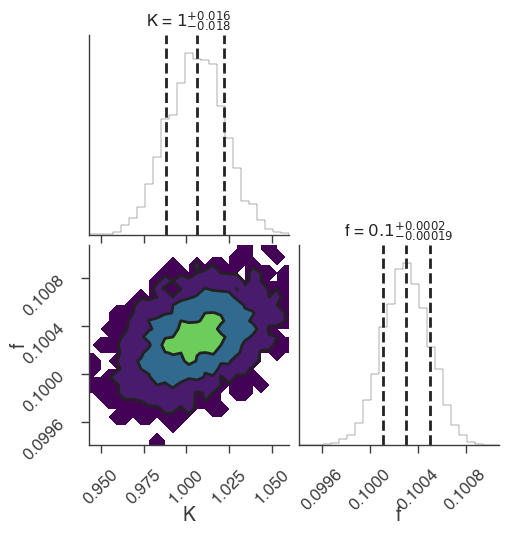

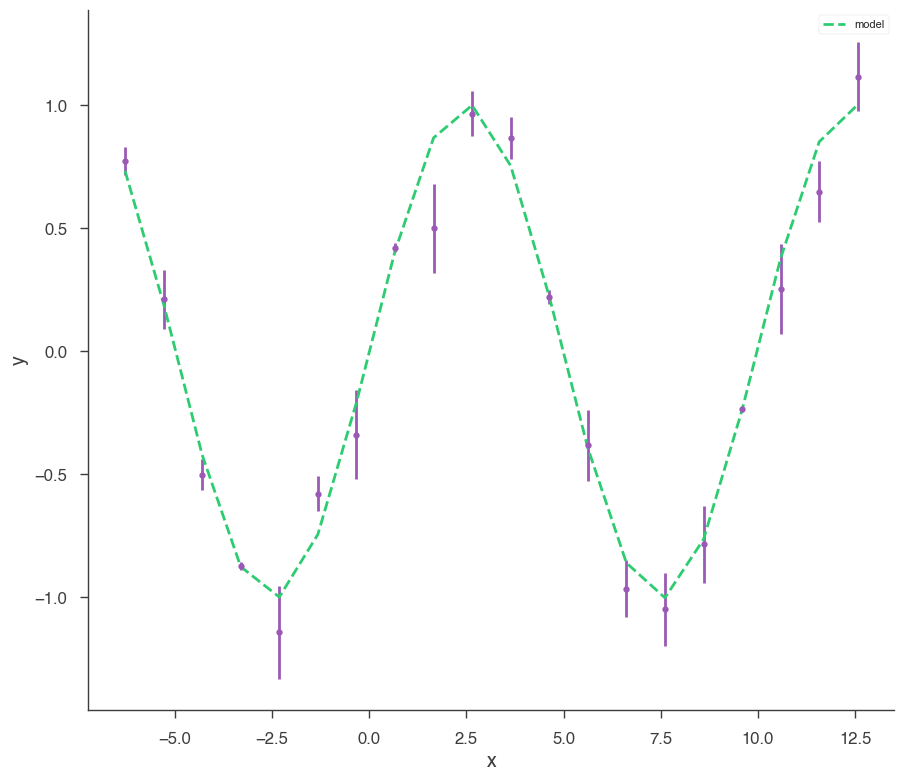

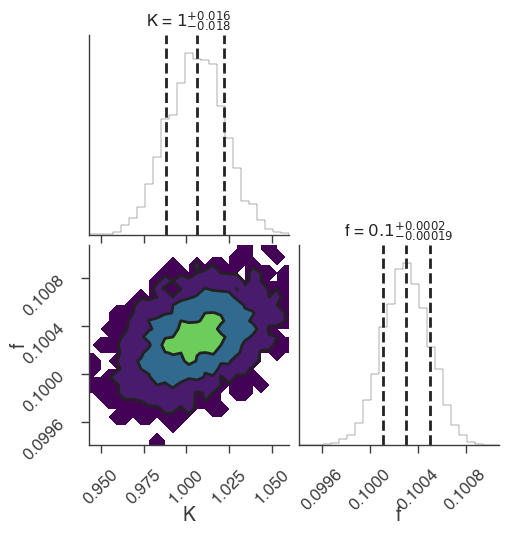

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

04:17:06 INFO      sampler set to zeus                                                     ]8;id=865466;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=163878;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   0%|          | 1/625 [00:00<01:06,  9.32it/s]

Sampling progress :   1%|          | 4/625 [00:00<00:30, 20.13it/s]

Sampling progress :   1%|          | 7/625 [00:00<00:25, 24.21it/s]

Sampling progress :   2%|▏         | 10/625 [00:00<00:24, 25.36it/s]

Sampling progress :   2%|▏         | 13/625 [00:00<00:23, 25.51it/s]

Sampling progress :   3%|▎         | 16/625 [00:00<00:22, 26.75it/s]

Sampling progress :   3%|▎         | 20/625 [00:00<00:20, 29.16it/s]

Sampling progress :   4%|▎         | 23/625 [00:00<00:21, 28.60it/s]

Sampling progress :   4%|▍         | 27/625 [00:01<00:20, 29.71it/s]

Sampling progress :   5%|▍         | 31/625 [00:01<00:19, 30.31it/s]

Sampling progress :   6%|▌         | 35/625 [00:01<00:19, 30.26it/s]

Sampling progress :   6%|▌         | 39/625 [00:01<00:19, 29.77it/s]

Sampling progress :   7%|▋         | 43/625 [00:01<00:19, 30.55it/s]

Sampling progress :   8%|▊         | 47/625 [00:01<00:18, 30.66it/s]

Sampling progress :   8%|▊         | 51/625 [00:01<00:18, 30.90it/s]

Sampling progress :   9%|▉         | 55/625 [00:01<00:18, 30.45it/s]

Sampling progress :   9%|▉         | 59/625 [00:02<00:18, 30.70it/s]

Sampling progress :  10%|█         | 63/625 [00:02<00:18, 30.37it/s]

Sampling progress :  11%|█         | 67/625 [00:02<00:18, 29.90it/s]

Sampling progress :  11%|█▏        | 71/625 [00:02<00:17, 30.89it/s]

Sampling progress :  12%|█▏        | 75/625 [00:02<00:17, 31.88it/s]

Sampling progress :  13%|█▎        | 79/625 [00:02<00:17, 31.83it/s]

Sampling progress :  13%|█▎        | 83/625 [00:02<00:16, 32.02it/s]

Sampling progress :  14%|█▍        | 87/625 [00:02<00:17, 30.72it/s]

Sampling progress :  15%|█▍        | 91/625 [00:03<00:16, 31.57it/s]

Sampling progress :  15%|█▌        | 95/625 [00:03<00:17, 30.88it/s]

Sampling progress :  16%|█▌        | 99/625 [00:03<00:16, 31.04it/s]

Sampling progress :  16%|█▋        | 103/625 [00:03<00:16, 30.99it/s]

Sampling progress :  17%|█▋        | 107/625 [00:03<00:17, 30.33it/s]

Sampling progress :  18%|█▊        | 111/625 [00:03<00:17, 30.13it/s]

Sampling progress :  18%|█▊        | 115/625 [00:03<00:17, 29.66it/s]

Sampling progress :  19%|█▉        | 119/625 [00:03<00:16, 30.35it/s]

Sampling progress :  20%|█▉        | 123/625 [00:04<00:16, 31.16it/s]

Sampling progress :  20%|██        | 127/625 [00:04<00:16, 30.62it/s]

Sampling progress :  21%|██        | 131/625 [00:04<00:16, 30.33it/s]

Sampling progress :  22%|██▏       | 135/625 [00:04<00:16, 30.42it/s]

Sampling progress :  22%|██▏       | 139/625 [00:04<00:15, 30.54it/s]

Sampling progress :  23%|██▎       | 143/625 [00:04<00:16, 30.00it/s]

Sampling progress :  24%|██▎       | 147/625 [00:04<00:15, 30.18it/s]

Sampling progress :  24%|██▍       | 151/625 [00:05<00:15, 30.83it/s]

Sampling progress :  25%|██▍       | 155/625 [00:05<00:14, 31.54it/s]

Sampling progress :  25%|██▌       | 159/625 [00:05<00:14, 31.71it/s]

Sampling progress :  26%|██▌       | 163/625 [00:05<00:14, 31.99it/s]

Sampling progress :  27%|██▋       | 167/625 [00:05<00:14, 31.48it/s]

Sampling progress :  27%|██▋       | 171/625 [00:05<00:14, 30.40it/s]

Sampling progress :  28%|██▊       | 175/625 [00:05<00:14, 30.43it/s]

Sampling progress :  29%|██▊       | 179/625 [00:05<00:14, 31.05it/s]

Sampling progress :  29%|██▉       | 183/625 [00:06<00:14, 31.57it/s]

Sampling progress :  30%|██▉       | 187/625 [00:06<00:13, 31.64it/s]

Sampling progress :  31%|███       | 191/625 [00:06<00:13, 31.25it/s]

Sampling progress :  31%|███       | 195/625 [00:06<00:13, 31.50it/s]

Sampling progress :  32%|███▏      | 199/625 [00:06<00:13, 31.20it/s]

Sampling progress :  32%|███▏      | 203/625 [00:06<00:13, 31.23it/s]

Sampling progress :  33%|███▎      | 207/625 [00:06<00:13, 31.41it/s]

Sampling progress :  34%|███▍      | 211/625 [00:06<00:13, 31.39it/s]

Sampling progress :  34%|███▍      | 215/625 [00:07<00:12, 32.19it/s]

Sampling progress :  35%|███▌      | 219/625 [00:07<00:12, 32.39it/s]

Sampling progress :  36%|███▌      | 223/625 [00:07<00:12, 32.03it/s]

Sampling progress :  36%|███▋      | 227/625 [00:07<00:12, 31.32it/s]

Sampling progress :  37%|███▋      | 231/625 [00:07<00:12, 31.21it/s]

Sampling progress :  38%|███▊      | 235/625 [00:07<00:12, 31.91it/s]

Sampling progress :  38%|███▊      | 239/625 [00:07<00:12, 31.96it/s]

Sampling progress :  39%|███▉      | 243/625 [00:07<00:12, 31.82it/s]

Sampling progress :  40%|███▉      | 247/625 [00:08<00:11, 31.89it/s]

Sampling progress :  40%|████      | 251/625 [00:08<00:12, 30.27it/s]

Sampling progress :  41%|████      | 255/625 [00:08<00:11, 31.66it/s]

Sampling progress :  41%|████▏     | 259/625 [00:08<00:11, 30.91it/s]

Sampling progress :  42%|████▏     | 263/625 [00:08<00:11, 31.32it/s]

Sampling progress :  43%|████▎     | 267/625 [00:08<00:11, 30.47it/s]

Sampling progress :  43%|████▎     | 271/625 [00:08<00:11, 30.67it/s]

Sampling progress :  44%|████▍     | 275/625 [00:08<00:11, 30.85it/s]

Sampling progress :  45%|████▍     | 279/625 [00:09<00:11, 30.53it/s]

Sampling progress :  45%|████▌     | 283/625 [00:09<00:11, 29.84it/s]

Sampling progress :  46%|████▌     | 286/625 [00:09<00:11, 29.59it/s]

Sampling progress :  46%|████▋     | 290/625 [00:09<00:11, 30.13it/s]

Sampling progress :  47%|████▋     | 294/625 [00:09<00:10, 30.53it/s]

Sampling progress :  48%|████▊     | 298/625 [00:09<00:10, 30.41it/s]

Sampling progress :  48%|████▊     | 302/625 [00:09<00:10, 29.79it/s]

Sampling progress :  49%|████▉     | 306/625 [00:10<00:10, 31.16it/s]

Sampling progress :  50%|████▉     | 310/625 [00:10<00:10, 30.44it/s]

Sampling progress :  50%|█████     | 314/625 [00:10<00:10, 30.78it/s]

Sampling progress :  51%|█████     | 318/625 [00:10<00:09, 31.23it/s]

Sampling progress :  52%|█████▏    | 322/625 [00:10<00:09, 31.24it/s]

Sampling progress :  52%|█████▏    | 326/625 [00:10<00:09, 31.75it/s]

Sampling progress :  53%|█████▎    | 330/625 [00:10<00:09, 31.32it/s]

Sampling progress :  53%|█████▎    | 334/625 [00:10<00:09, 30.61it/s]

Sampling progress :  54%|█████▍    | 338/625 [00:11<00:09, 31.10it/s]

Sampling progress :  55%|█████▍    | 342/625 [00:11<00:09, 30.94it/s]

Sampling progress :  55%|█████▌    | 346/625 [00:11<00:08, 31.26it/s]

Sampling progress :  56%|█████▌    | 350/625 [00:11<00:09, 30.55it/s]

Sampling progress :  57%|█████▋    | 354/625 [00:11<00:08, 31.36it/s]

Sampling progress :  57%|█████▋    | 358/625 [00:11<00:08, 31.27it/s]

Sampling progress :  58%|█████▊    | 362/625 [00:11<00:08, 31.45it/s]

Sampling progress :  59%|█████▊    | 366/625 [00:11<00:08, 31.01it/s]

Sampling progress :  59%|█████▉    | 370/625 [00:12<00:07, 31.94it/s]

Sampling progress :  60%|█████▉    | 374/625 [00:12<00:07, 31.43it/s]

Sampling progress :  60%|██████    | 378/625 [00:12<00:07, 32.02it/s]

Sampling progress :  61%|██████    | 382/625 [00:12<00:07, 31.56it/s]

Sampling progress :  62%|██████▏   | 386/625 [00:12<00:07, 30.80it/s]

Sampling progress :  62%|██████▏   | 390/625 [00:12<00:07, 31.14it/s]

Sampling progress :  63%|██████▎   | 394/625 [00:12<00:07, 32.31it/s]

Sampling progress :  64%|██████▎   | 398/625 [00:12<00:07, 31.09it/s]

Sampling progress :  64%|██████▍   | 402/625 [00:13<00:07, 30.54it/s]

Sampling progress :  65%|██████▍   | 406/625 [00:13<00:07, 30.99it/s]

Sampling progress :  66%|██████▌   | 410/625 [00:13<00:06, 32.28it/s]

Sampling progress :  66%|██████▌   | 414/625 [00:13<00:06, 31.95it/s]

Sampling progress :  67%|██████▋   | 418/625 [00:13<00:06, 32.16it/s]

Sampling progress :  68%|██████▊   | 422/625 [00:13<00:06, 32.82it/s]

Sampling progress :  68%|██████▊   | 426/625 [00:13<00:06, 32.81it/s]

Sampling progress :  69%|██████▉   | 430/625 [00:13<00:05, 32.95it/s]

Sampling progress :  69%|██████▉   | 434/625 [00:14<00:05, 33.11it/s]

Sampling progress :  70%|███████   | 438/625 [00:14<00:05, 33.02it/s]

Sampling progress :  71%|███████   | 442/625 [00:14<00:05, 33.14it/s]

Sampling progress :  71%|███████▏  | 446/625 [00:14<00:05, 32.82it/s]

Sampling progress :  72%|███████▏  | 450/625 [00:14<00:05, 32.08it/s]

Sampling progress :  73%|███████▎  | 454/625 [00:14<00:05, 32.19it/s]

Sampling progress :  73%|███████▎  | 458/625 [00:14<00:05, 32.00it/s]

Sampling progress :  74%|███████▍  | 462/625 [00:14<00:05, 32.07it/s]

Sampling progress :  75%|███████▍  | 466/625 [00:15<00:05, 31.45it/s]

Sampling progress :  75%|███████▌  | 470/625 [00:15<00:04, 32.30it/s]

Sampling progress :  76%|███████▌  | 474/625 [00:15<00:04, 31.56it/s]

Sampling progress :  76%|███████▋  | 478/625 [00:15<00:04, 31.09it/s]

Sampling progress :  77%|███████▋  | 482/625 [00:15<00:04, 30.98it/s]

Sampling progress :  78%|███████▊  | 486/625 [00:15<00:04, 30.50it/s]

Sampling progress :  78%|███████▊  | 490/625 [00:15<00:04, 30.61it/s]

Sampling progress :  79%|███████▉  | 494/625 [00:15<00:04, 30.99it/s]

Sampling progress :  80%|███████▉  | 498/625 [00:16<00:04, 30.09it/s]

Sampling progress :  80%|████████  | 502/625 [00:16<00:03, 31.10it/s]

Sampling progress :  81%|████████  | 506/625 [00:16<00:03, 31.27it/s]

Sampling progress :  82%|████████▏ | 510/625 [00:16<00:03, 32.08it/s]

Sampling progress :  82%|████████▏ | 514/625 [00:16<00:03, 31.38it/s]

Sampling progress :  83%|████████▎ | 518/625 [00:16<00:03, 30.99it/s]

Sampling progress :  84%|████████▎ | 522/625 [00:16<00:03, 31.77it/s]

Sampling progress :  84%|████████▍ | 526/625 [00:16<00:03, 31.58it/s]

Sampling progress :  85%|████████▍ | 530/625 [00:17<00:03, 30.61it/s]

Sampling progress :  85%|████████▌ | 534/625 [00:17<00:02, 30.69it/s]

Sampling progress :  86%|████████▌ | 538/625 [00:17<00:02, 31.24it/s]

Sampling progress :  87%|████████▋ | 542/625 [00:17<00:02, 30.89it/s]

Sampling progress :  87%|████████▋ | 546/625 [00:17<00:02, 30.52it/s]

Sampling progress :  88%|████████▊ | 550/625 [00:17<00:02, 31.60it/s]

Sampling progress :  89%|████████▊ | 554/625 [00:17<00:02, 30.55it/s]

Sampling progress :  89%|████████▉ | 558/625 [00:18<00:02, 31.21it/s]

Sampling progress :  90%|████████▉ | 562/625 [00:18<00:01, 31.78it/s]

Sampling progress :  91%|█████████ | 566/625 [00:18<00:01, 30.78it/s]

Sampling progress :  91%|█████████ | 570/625 [00:18<00:01, 31.76it/s]

Sampling progress :  92%|█████████▏| 574/625 [00:18<00:01, 31.63it/s]

Sampling progress :  92%|█████████▏| 578/625 [00:18<00:01, 30.41it/s]

Sampling progress :  93%|█████████▎| 582/625 [00:18<00:01, 30.14it/s]

Sampling progress :  94%|█████████▍| 586/625 [00:18<00:01, 30.31it/s]

Sampling progress :  94%|█████████▍| 590/625 [00:19<00:01, 30.53it/s]

Sampling progress :  95%|█████████▌| 594/625 [00:19<00:01, 30.17it/s]

Sampling progress :  96%|█████████▌| 598/625 [00:19<00:00, 30.31it/s]

Sampling progress :  96%|█████████▋| 602/625 [00:19<00:00, 30.74it/s]

Sampling progress :  97%|█████████▋| 606/625 [00:19<00:00, 31.26it/s]

Sampling progress :  98%|█████████▊| 610/625 [00:19<00:00, 31.10it/s]

Sampling progress :  98%|█████████▊| 614/625 [00:19<00:00, 31.39it/s]

Sampling progress :  99%|█████████▉| 618/625 [00:19<00:00, 31.56it/s]

Sampling progress : 100%|█████████▉| 622/625 [00:20<00:00, 30.69it/s]

Sampling progress : 100%|██████████| 625/625 [00:20<00:00, 30.95it/s]

04:17:27 INFO      fit restored to maximum of posterior                                         ]8;id=378466;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=210454;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=803757;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=886993;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 25


Scale Factor: 1.31379


Mean Integrated Autocorrelation Time: 286.16


Effective Sample Size: 43.68


Number of Log Probability Evaluations: 73103


Effective Samples per Log Probability Evaluation: 0.000598


None


Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                                  
demo.spectrum.main.Sin.K               1.005 -0.020 +0.016  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (1.0031 -0.0024 +0.0019) x 10^-1        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo         -9.966618
total        -9.966618

Values of statistical measures:

statistical measures
AIC              24.639119
BIC              25.924701
DIC              98.224848
PDIC            -10.517948

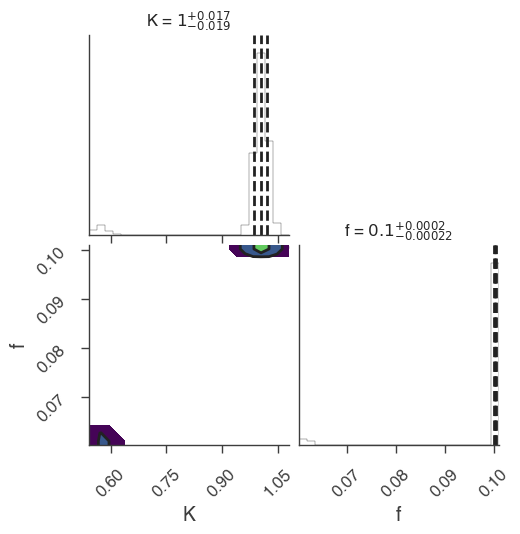

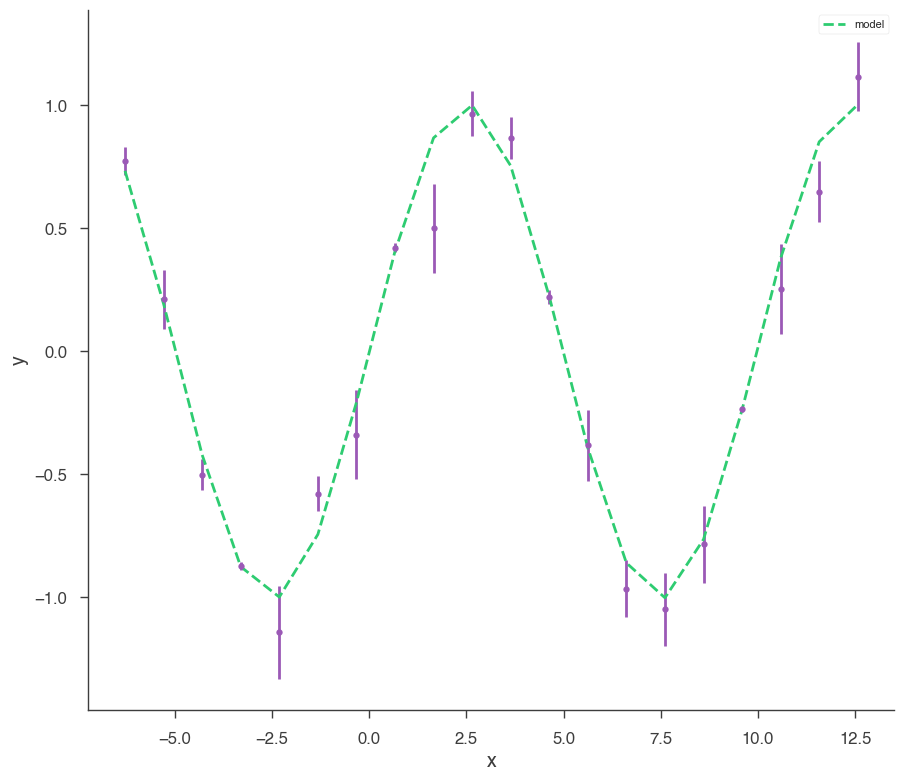

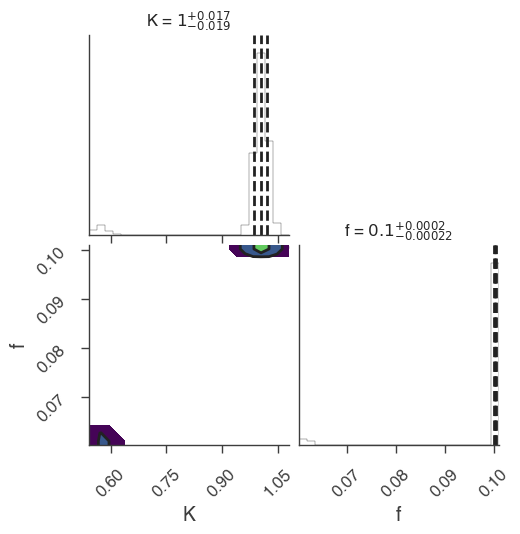

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

04:17:28 INFO      sampler set to ultranest                                                ]8;id=979216;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=365333;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-1e+01  


[ultranest] Likelihood function evaluations: 12999


[ultranest]   logZ = -20.55 +- 0.1121


[ultranest] Effective samples strategy satisfied (ESS = 970.5, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.16 bs:0.11 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


04:17:42 INFO      fit restored to maximum of posterior                                         ]8;id=363908;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=987863;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=190191;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=894122;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                                  
demo.spectrum.main.Sin.K               1.005 -0.016 +0.017  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (1.0030 -0.0018 +0.0019) x 10^-1        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo         -9.967231
total        -9.967231

Values of statistical measures:

statistical measures
AIC                24.640345
BIC                25.925928
DIC                23.780568
PDIC                1.923231
log(Z)             -8.916773

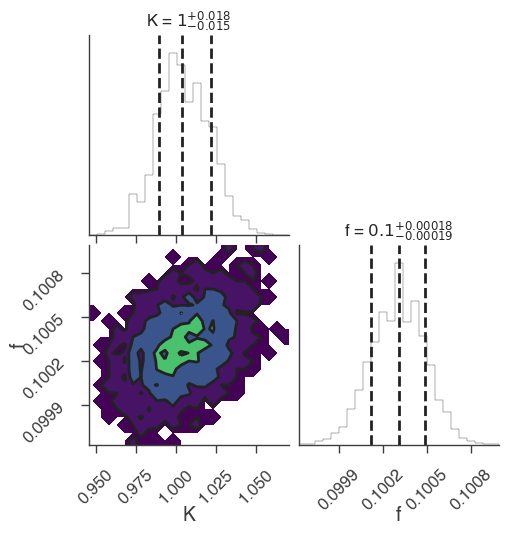

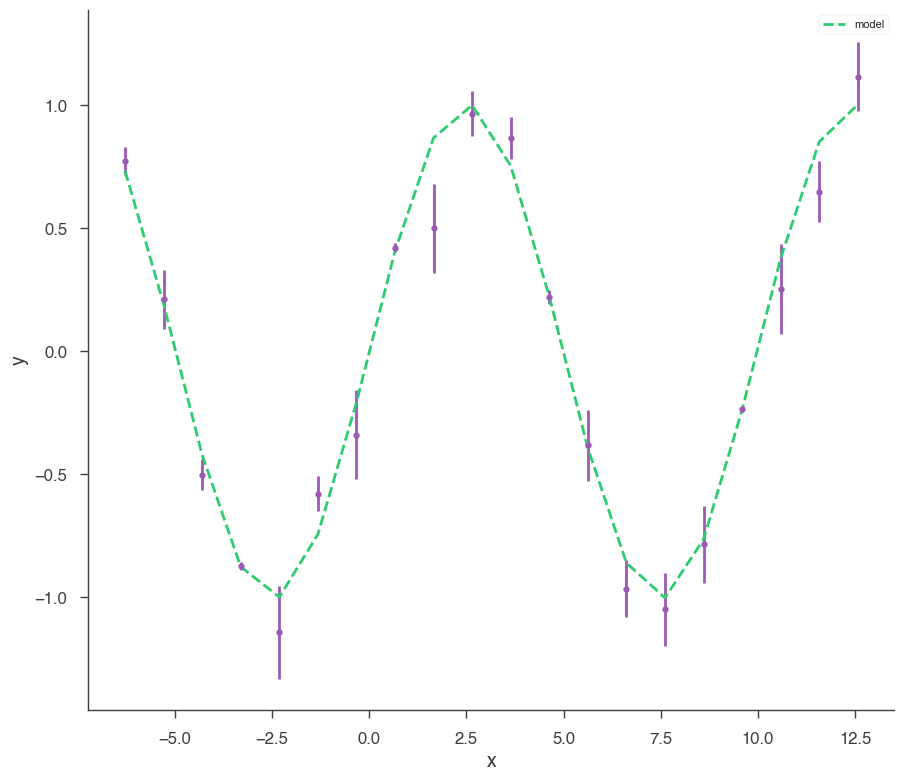

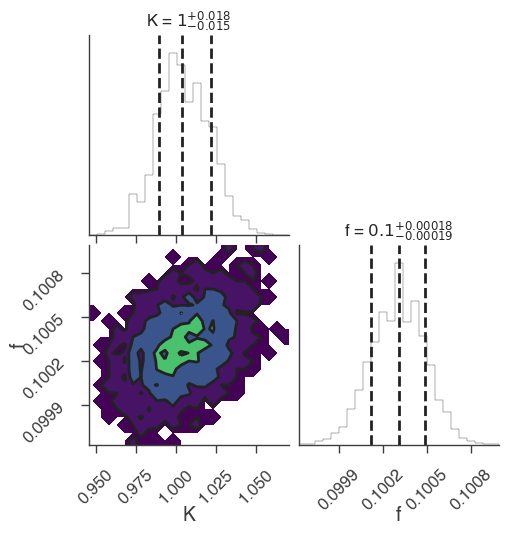

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()